In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Shaurya\Desktop\Credit Card\train.csv")

In [3]:
df2 = pd.read_csv(r"C:\Users\Shaurya\Desktop\Credit Card\test.csv")

In [4]:
df = df.append(df2)

In [5]:
df.head()

,Unnamed: 0,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
0,1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,-1134,1,0,0,0,Security staff,2,-29,No,0
1,2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1,-4,No,0
2,3,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1,-26,No,0
3,4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1,-26,No,0
4,5,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1,-38,No,0


In [53]:
df['target'].value_counts()

0    24712
1      422
Name: target, dtype: int64

#Droping Variable

In [6]:
df=df.drop(["Unnamed: 0","ID","FLAG_MOBIL"],axis=1)

# Checking Object Variable

In [7]:
TextData = df.select_dtypes(include=["object"])

In [8]:
TextData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 7539
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     25134 non-null  object
 1   Car        25134 non-null  object
 2   Reality    25134 non-null  object
 3   inctp      25134 non-null  object
 4   edutp      25134 non-null  object
 5   famtp      25134 non-null  object
 6   houtp      25134 non-null  object
 7   occyp      25134 non-null  object
 8   dep_value  25134 non-null  object
dtypes: object(9)
memory usage: 1.9+ MB


In [9]:
TextData.nunique()

Gender        2
Car           2
Reality       2
inctp         5
edutp         5
famtp         5
houtp         6
occyp        18
dep_value     2
dtype: int64

In [10]:
dumm = pd.get_dummies(df,columns=["Gender","Car","Reality","inctp","edutp","famtp","houtp","dep_value"])

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dumm["occyp"] = le.fit_transform(dumm["occyp"])

# Checking Non Text Data

In [12]:
NonTextData = df.select_dtypes(exclude=["object"])

In [13]:
NonTextData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 7539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ChldNo         25134 non-null  int64  
 1   inc            25134 non-null  float64
 2   DAYS_BIRTH     25134 non-null  int64  
 3   DAYS_EMPLOYED  25134 non-null  int64  
 4   wkphone        25134 non-null  int64  
 5   phone          25134 non-null  int64  
 6   email          25134 non-null  int64  
 7   famsize        25134 non-null  int64  
 8   begin_month    25134 non-null  int64  
 9   target         25134 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.1 MB


In [14]:
NonTextData.nunique()

ChldNo              9
inc               195
DAYS_BIRTH       5206
DAYS_EMPLOYED    3299
wkphone             2
phone               2
email               2
famsize            10
begin_month        61
target              2
dtype: int64

<AxesSubplot:>

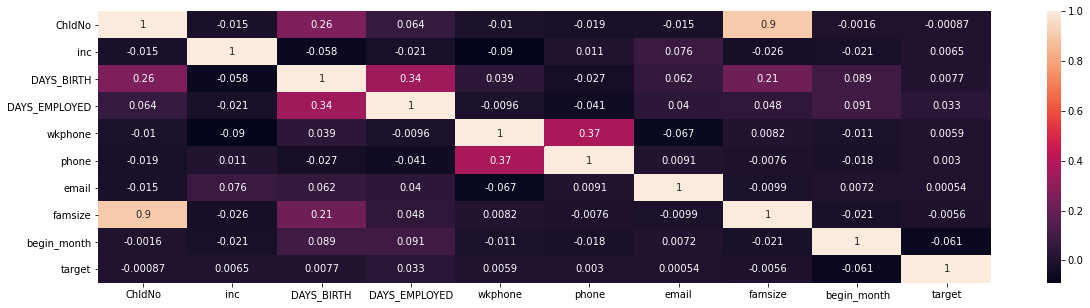

In [15]:
plt.figure(figsize=(20,5))
sns.heatmap(NonTextData.corr(),annot=True)

<AxesSubplot:>

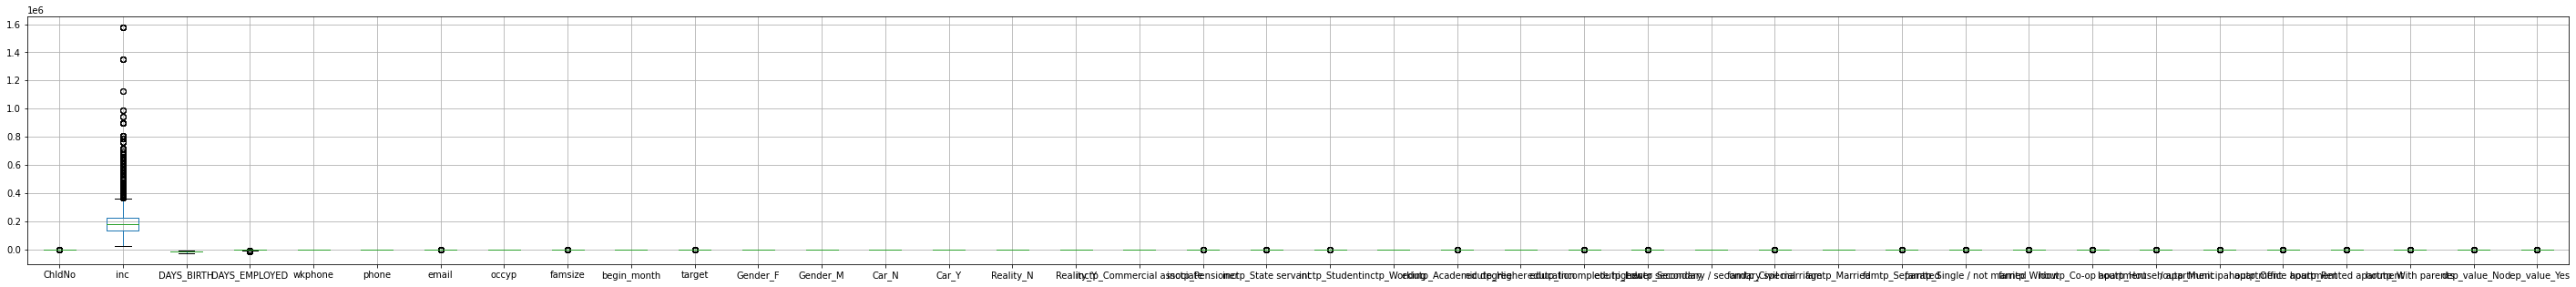

In [16]:
plt.figure(figsize=(50,5))
dumm.boxplot()

In [17]:
max=dumm['inc'].quantile(0.95)
new=np.where(dumm['inc']>max,max,dumm['inc'])
dumm.inc=new

min=dumm['inc'].quantile(0.05)
new=np.where(dumm['inc']<min,min,dumm['inc'])
dumm.inc=new

In [18]:
x = dumm.drop(columns=["target"])
y = dumm["target"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20107, 39), (5027, 39), (20107,), (5027,))

In [58]:
y_train.value_counts()

0    19782
1      325
Name: target, dtype: int64

# XG Boost

In [22]:
from xgboost import XGBClassifier

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
XGB = XGBClassifier(n_estimators=1000,learning_rate=0.001,max_depth=10,min_child_weight=50,use_label_encoder=False)

In [43]:
Mat = [(x_test,y_test)]
XGB.fit(x_train,y_train,eval_metric=["logloss","error"],eval_set=Mat,verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=50, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [44]:
predictXGB = XGB.predict(x_test)

In [57]:
y_test.value_counts()

0    4930
1      97
Name: target, dtype: int64

In [45]:
confusion_matrix(predictXGB,y_test)

array([[4930,    0],
       [   0,   97]], dtype=int64)